# Building a simple NN

## 1. The problem:
- The development of neural networks have been key to teaching computers to solve problems the way humans do.
- Tasks normally fall under two categories: regression and **classification**

#### Regression: 
- Target Prediction.
- Map input variables (features) to some continuous function (hypothesis).
![Image of Regression](https://yanndubs.github.io/img/blog/Linear-regression.png)

#### Classification:
- Label assignment.
- Map features into discrete categories or classes.
![Image of Classification](https://www.tutorialspoint.com/mahout/images/classification.jpg)


## 2. Choose the data
- Now that we've chosen classification, must find a data set that calls for classification

#### Wine Data Set:
- https://archive.ics.uci.edu/ml/datasets/wine
- 178 wine instances
- 13 wine attributes (Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline)
- 3 catergories of wine types



In [1]:
from sklearn.datasets import load_wine

data = load_wine()
x,y = data.data,data.target

In [2]:
from collections import OrderedDict
import pandas as pd
wine_data = OrderedDict({'Alcohol': x[:,0], 'Malic Acid': x[:,1],
             'Ash': x[:,2], 'Alcalinity of ash': x[:,3],
             'Magnesium' : x[:,4], 'Total phenols' : x[:,5],     
             'Flavenoids' : x[:,6], 'Nonflavanoid phenols' : x[:,7],           
             'Proanthocyanins' : x[:,8], 'Color intensity' : x[:,9],
             'Hue' : x[:,10], 'OD280/OD315 of diluted wines' : x[:,11],
             'Proline' :x[:,12], 'Wine type' : y[:] })
df = pd.DataFrame(wine_data)
df

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavenoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


#### Important to scale the data
- Done to decrease the range of values in data set
- sklearn's standard scaler uses the following 
$$ x0 = \frac{x-u}{s} $$
- Where x is the input feature, and u and s are the mean and the standard deviation of the training samples, respectively

/Users/sayred1/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


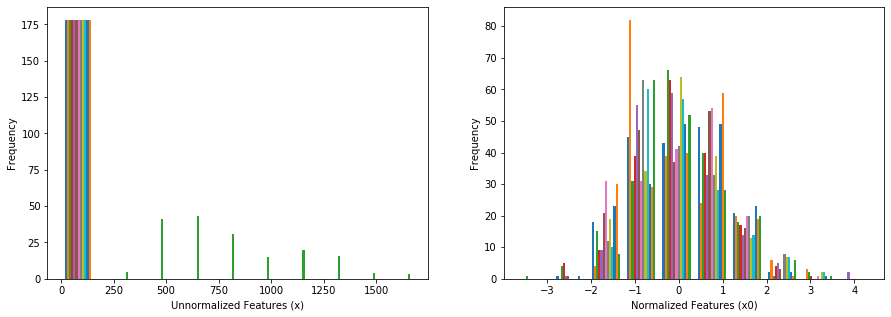

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# scale the data
scaler = StandardScaler()  
scaler.fit(x)  
x0 = scaler.transform(x)

# reshape the target list (178,) to (178,3)
ohe = OneHotEncoder()
y0 = ohe.fit_transform(np.expand_dims(y, axis=1)).toarray()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(x)
plt.xlabel('Unnormalized Features (x)')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(x0)
plt.xlabel('Normalized Features (x0)')
plt.ylabel('Frequency')
plt.savefig('normalization.png',bbox_inches = 'tight')

plt.show()

## 3. Choose neural network componants
- Layers & Neurons/Layer
- Neuron Activation functions
- Cost function
- Optimizer

![Image of NN](http://thewindowsclub.thewindowsclubco.netdna-cdn.com/wp-content/uploads/2017/11/Neural-Network.jpg)


#### Layers & Neurons/Layer:
- Input layer: Number of neurons comprising that layer is equal to the **number of features** in your data - **13**
- Output layer: For classifiers, NNs have single node unless softmax is used in which case the output layer has **one node per class label** in your model - **3**
- Hidden layers: **One hidden layer** is sufficient for the large majority of problems, that's **boring** - choose **2 hidden layers**. The optimal size of the hidden layer (**number of neurons/layer**) is usually **between input and output layer size** - **4 each**.
- More info... http://www.faqs.org/faqs/ai-faq/neural-nets/part1/preamble.html.
- Summary: **4 layers - input (13 nodes), hidden layer 1 (4 nodes), hidden layer 2 (4 nodes), output layer (3 nodes).**

#### Neuron Activation functions:
- For **classification** we use only **non-linear activation** functions so that the our output label is between 0 and 1 (probabilities).
    - linear activation functions may provide any number between -inf to inf.

![Activation functions](https://engmrk.com/wp-content/uploads/2018/05/Activataion_Function-details.jpg)

- Although known to be the slower of activation functions, we choose **sigmoid** since it **outputs** the conditional probabilities of the prediction, the **class probabilities**.
    - easy derivative
    - **hidden layers**
    
- To increase model complexity, choose tanh as output activation function
    - similar to sigmoid
    - **negative inputs** will be **mapped strongly negative** and the **zero inputs** will be **mapped near zero** in the tanh graph.
    
#### Cost function:
- Moniters how well the neural network is doing (**how far the model's prediction y_ is from the true class y**)
- Goal is to iteratively **minimize the cost** 

$$ L = \frac{1}{m}\sum_{i\in C} y_i \log {y\__i} $$

- **Log loss**: measures the **uncertainty of** the **probabilities** of your model by comparing them to the true labels

#### Optimizer:
- Responsible for updating NN parameters (weights and bias) such that loss decreases.
    - Based off of gradients of parameters. **will not get into this right now**
- Comparison of optimizer learned in class, **gradient descent**, and two others, **gradient descent + momentum** & **ADAM**.
- **gradient descent + momentum**
    - momentum term (**momenum in same direction**)
    
$$ v_{i} = \mu * v_{i-1} + (1-\mu)*\frac{dw_{i-1}}{dL} $$
$$ w_{i} = \eta*v_{i} - w_{i-1}$$

- **ADAM**
    - as opposed to updating weights based off strictly gradient of weights, update based on **first and second moments** of gradients of weights.
    - mean and variance

$$ (\frac{\partial w_i}{\partial L})_{mean} = \beta_1 * (\frac{\partial w_{i-1}}{\partial L})_{mean} + (1-\beta_1)*\frac{\partial w_{i-1}}{\partial L} \label{eq:ADAM-mom-1} $$ 

$$ (\frac{\partial w_i}{\partial L})_{variance} = \beta_2 * (\frac{\partial w_{i-1}}{\partial L})_{variance} + (1-\beta_2)*(\frac{\partial w_{i-1}}{\partial L})^2 $$

$$ w_i = \eta * \frac{(\frac{\partial w_i}{\partial L})_{variance}}{\sqrt{(\frac{\partial w_{i}}{\partial L})_{mean} + \epsilon}} -w_{i-1} $$

- Later I implement parameter tuning for each optimizer to determine best parameters for this problem, then I compare the performance between optimizers


## 4. Architecture 

**1. Forward**
    - output of first hidden layer: 
$$ z_1 = w_1\cdot x + b_1 $$
$$ h_1 = \sigma(z_1)\\ $$

    - output of second hidden layer:
$$ z_2 = w_2\cdot h_1 + b_2 $$
$$ h_2 = \sigma(z_2)\\ $$

    - output of output layer:
$$ z_3 = w_3\cdot h_2 + b_3 $$
$$ y\_ = \sigma{(z_3)} \\ $$

    - x is feature input, w is weighted connections, b is some bias, y_ is the model prediction
    - calculate cost

**2. Backward**
    - obtain gradients of w and b w.r.t. cost

**3. Optimze**

**4. Return to 1 until convergence or until max iterations.**

In [4]:
# %matplotlib inline
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import sklearn

class ANN(object):
    
    def __init__(self, hidden, max_iter, learning_rate, 
                 optimizer, decay_rate1,
                 decay_rate2, mu, epsilon):
        
        """
        
        Neural network hyperparameters
        
        hidden: number of neurons in each hidden layer
        iterations: number of max iterations
        learning_rate: learning rate for optimization
        optimizer: choice of optimizer
        decay_rate1: decay rate 1 for optimizer
        decay_rate2: decay rate 2 for optimizer
        mu: momentum parameter for optimizer
        epsilon: optimizer parameter to prevent divergence
        """
        
        self.n_hid1, self.n_hid2 = hidden[0], hidden[1]
        self.iterations = max_iter
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        self.decay_rate1 = decay_rate1
        self.decay_rate2 = decay_rate2
        self.mu = mu 
        self.epsilon = epsilon        
    
    def train(self, x, y):      
        
        
        # Initialize NN parameters (weights and biases)
        self.dim_in, self.dim_out = x.shape[1], 3
        self.w1 = np.random.randn(self.dim_in, self.n_hid1) # [13,4] -- 52 weights 
        self.w2 = np.random.randn(self.n_hid1, self.n_hid2) # [4,4] -- 16 weights
        self.w3 = np.random.randn(self.n_hid2, self.dim_out) # [4,3] -- 12 weights
        self.b1 = np.random.randn(1,self.n_hid1) # [1,4] -- 4 biases
        self.b2 = np.random.randn(1,self.n_hid2) # [1,4] -- 4 biases
        self.b3 = np.random.randn(1,self.dim_out)  # [1,3] -- 3 bias
        self.loss_hist = [] # track loss for printing
        self.converged_iter = None
        
        # iteratively train until convergence or until iterations reached
        for i in range(self.iterations):

            # forward
            (h1,h2,y_) = self.forward(x)
            
            # calculate cost
            cost = self.loss_function(y_,y) 
            
            # backprop
            (gradw3,gradb3,gradw2,gradb2,gradw1,gradb1) = self.backward(x,h1,h2,y_,y)
            
            # optimize
            self.optimize(gradw3,gradb3,gradw2,gradb2,gradw1,gradb1,i)
            
            # store cost
            self.loss_hist.append(cost)
            
            # store iteration of convergence
            if i > 0 and abs(self.loss_hist[-2]  - self.loss_hist[-1]) < 1e-3 and self.converged_iter == None:
                self.converged_iter = i
            
        # store converged parameters  
        self.weights = (self.w3, self.w2, self.w1)
        self.bias = (self.b3, self.b2, self.b1)
        
    def optimize(self,gradw3,gradb3,gradw2,gradb2,gradw1,gradb1,i):
        
        """
        Vectorized optimization techniques
        """
        
        # flatten all parameters and their gradients
        w = np.concatenate((self.w1.flatten(),self.w2.flatten(),self.w3.flatten()))
        b = np.concatenate((self.b1.flatten(),self.b2.flatten(),self.b3.flatten()))
        gradw = np.concatenate((gradw1.flatten(),gradw2.flatten(),gradw3.flatten()))
        gradb = np.concatenate((gradb1.flatten(),gradb2.flatten(),gradb3.flatten()))
        
        
        if self.optimizer == 'ADAM':
            
            # initialize moments
            wv = np.zeros(w.shape)
            wm = np.zeros(w.shape)
            bv = np.zeros(b.shape)
            bm = np.zeros(b.shape)
            
            # update moments
            wv = self.decay_rate1 * wv + (1-self.decay_rate1) * gradw
            wm = self.decay_rate2 * wm + (1-self.decay_rate2) * gradw**2
            bv = self.decay_rate1 * bv + (1-self.decay_rate1) * gradb
            bm = self.decay_rate2 * bm + (1-self.decay_rate2) * gradb**2

            # update params
            w -= self.learning_rate * wv/np.sqrt(wm+self.epsilon)
            b -= self.learning_rate * bv/np.sqrt(bm+self.epsilon)
        
        elif self.optimizer == 'GD+M':
            
            # initialize momentum
            vdw = np.zeros(w.shape)
            vdb = np.zeros(b.shape)
        
            # update momentum
            vdw = self.mu * vdw + (1-self.mu) * gradw
            vdb = self.mu * vdb + (1-self.mu) * gradb

            w -= self.learning_rate*vdw
            b -= self.learning_rate*vdb
        
        else:
            
            # gradient desecent
            
            learning_rate = self.learning_rate * (self.decay_rate1**i)
        
            w -= learning_rate*gradw
            b -= learning_rate*gradb

        # reshape parameters
        self.reshape_params(w,b)

    def reshape_params(self,w,b):
        
        """
        This function reshapes NN parameters from flattened 
        """
        
        beginw = 0
        endw = self.dim_in * self.n_hid1
        beingb = 0
        endb = beingb + self.n_hid1
        self.w1 = np.reshape(w[beginw:endw], self.w1.shape)
        self.b1 = np.reshape(b[beingb:endb], self.b1.shape)
        
        beginw = endw
        endw = beginw + (self.n_hid1 * self.n_hid2)
        beginb = endb
        endb = beginb + self.n_hid2
        self.w2 = np.reshape(w[beginw:endw], self.w2.shape)
        self.b2 = np.reshape(b[beginb:endb], self.b2.shape)
        
        beginw = endw
        endw = beginw + (self.n_hid2 * self.dim_out)
        beginb = endb
        endb = beginb + self.dim_out
        self.w3 = np.reshape(w[beginw:endw], self.w3.shape)
        self.b3 = np.reshape(b[beginb:endb], self.b3.shape)
    
    def loss_function(self,y_,y): 
        
        """
        log loss cost function
        """
        
        m = len(y)
        y_ /= y_.sum(axis=1)[:, np.newaxis]
        return -1 * np.sum(y * np.log(y_))/len(y)
        
    def hid_activation(self,x): 
        
        """
        sigmoid activation function, for hidden layers
        """
        
        return 1./(1+np.exp(-x))

    def grad_activation(self,x):
        
        """
        gradient of sigmoid
        """
        
        return x * (1-x)

    def out_activation(self,x): 
        
        """
        tanh activation function, for output layer
        """
        
        return np.exp(x)/np.sum(np.exp(x),axis=1)[:, np.newaxis] 
        
    def forward(self,x):
        
        """
        obtain class prediction of current wine instance
        """
        
        z1 = np.dot(x,self.w1)+self.b1
        h1 = self.hid_activation(z1)
        z2 = np.dot(h1,self.w2)+self.b2
        h2 = self.hid_activation(z2)
        z3 = np.dot(h2,self.w3)+self.b3
        y_ = self.out_activation(z3) 
        return(h1,h2,y_)
    
    def backward(self, x, h1, h2, y_, y):
        
        """
        obtain gradients of cost w.r.t parameters for optimization
        """
        
        delta3 = (y_-y)
        gradw3 = np.dot(np.transpose(h2),delta3)
        gradb3 = np.sum(delta3, axis = 0)
        delta2 = np.dot(delta3, np.transpose(self.w3)) * self.grad_activation(h2)
        gradw2 = np.dot(np.transpose(h1),delta2)
        gradb2 = np.sum(delta2, axis=0)  
        delta1 = np.dot(delta2, np.transpose(self.w2)) * self.grad_activation(h1)
        gradw1 = np.dot(np.transpose(x),delta1)
        gradb1 = np.sum(delta1, axis=0)
        return(gradw3,gradb3,gradw2,gradb2,gradw1,gradb1)
    
    def predict(self, x):
        
        """
        checks if model can make prediction after all training is done
        ideally want a new wine data set that NN hasn't seen
        """
        
        (h1, h2, y) = self.forward(x)
        y_ = np.zeros(y.shape[0],int) 
        # array to reshape predictions to (178,)
        for i in range(len(y)):
            for j in range(len(y[i])):
                y[i,j] = round(y[i,j],0)
            y_[i] = np.argmax(y[i])
        return y_

In [5]:
def predict_accuracy(y_,y):
    
    """
    function to calc. NN accuracy prediction
    """
    
    count = 0
    for i in range(len(y_)):
        if y_[i] == y[i]:
            count += 1
    print('prediction accuracy is: {:6.2f} %'.format(100*round(count/len(y_),3)))

## parameter tuning for GD parameters 
- ##### lr: 0.1, 0.01, 0.001, 0.0001

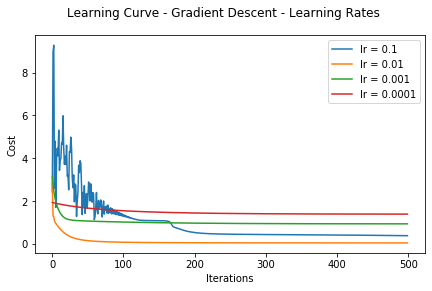

prediction accuracy is:  95.50 %
prediction accuracy is: 100.00 %
prediction accuracy is:  33.10 %
prediction accuracy is:  40.40 %


In [6]:
NN1 = ANN(hidden=[4,4], max_iter=500 , optimizer = 'GD',learning_rate=0.1,decay_rate1=0.99, mu = None, decay_rate2=None,epsilon=None)
NN2 = ANN(hidden=[4,4], max_iter=500 , optimizer = 'GD',learning_rate=0.01,decay_rate1=0.99, mu = None, decay_rate2=None,epsilon=None)
NN3 = ANN(hidden=[4,4], max_iter=500 , optimizer = 'GD',learning_rate=0.001,decay_rate1=0.99, mu = None, decay_rate2=None,epsilon=None)
NN4 = ANN(hidden=[4,4], max_iter=500 , optimizer = 'GD',learning_rate=0.0001,decay_rate1=0.99, mu = None, decay_rate2=None,epsilon=None)

NN1.train(x0,y0)
cache1 = NN1.loss_hist

NN2.train(x0,y0)
cache2 = NN2.loss_hist

NN3.train(x0,y0)
cache3 = NN3.loss_hist

NN4.train(x0,y0)
cache4 = NN4.loss_hist

_iter = np.arange(0,500)

plt.figure(figsize=(7,4))
plt.suptitle('Learning Curve - Gradient Descent - Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(_iter,cache1,label = 'lr = 0.1')
plt.plot(_iter,cache2,label = 'lr = 0.01')
plt.plot(_iter,cache3,label = 'lr = 0.001')
plt.plot(_iter,cache4,label = 'lr = 0.0001')
plt.legend()
plt.savefig('LCGradDesc.png',bbox_inches = 'tight')
plt.show()

predict_accuracy(NN1.predict(x0),y)
predict_accuracy(NN2.predict(x0),y)
predict_accuracy(NN3.predict(x0),y)
predict_accuracy(NN4.predict(x0),y)

### If you keep running the code block above, you see that the only lr that yields consistent prediction accuracy is lr = 0.01. So for gradient descent, I choose lr = 0.01 as the optimal hyperparamter. I don't choose 0.1 b/c is isn't consistent and it doesn't converge as fast as 0.01.

## parameter tuning for GD + Momentum
- #### Here we keep learning rate 0.01, and vary mu which ranges from 0 to 1
- #### choose mu = 0.10, 0.30, 0.60, 0.90, 0.99

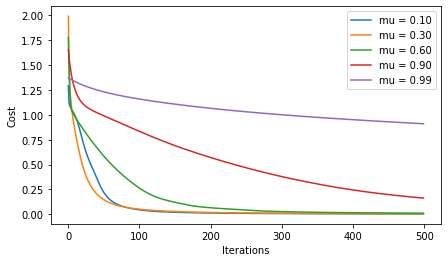

prediction accuracy is: 100.00 %
prediction accuracy is: 100.00 %
prediction accuracy is: 100.00 %
prediction accuracy is:  96.60 %
prediction accuracy is:  33.10 %


In [7]:
NN1 = ANN(hidden=[4,4], max_iter=500 , optimizer = 'GD+M',learning_rate=0.01,decay_rate1=None, decay_rate2=None, mu = 0.10,epsilon=None)
NN2 = ANN(hidden=[4,4], max_iter=500 , optimizer = 'GD+M',learning_rate=0.01,decay_rate1=None, decay_rate2=None, mu = 0.30,epsilon=None)
NN3 = ANN(hidden=[4,4], max_iter=500 , optimizer = 'GD+M',learning_rate=0.01,decay_rate1=None, decay_rate2=None, mu = 0.60,epsilon=None)
NN4 = ANN(hidden=[4,4], max_iter=500 , optimizer = 'GD+M',learning_rate=0.01,decay_rate1=None, decay_rate2=None, mu = 0.90,epsilon=None)
NN5 = ANN(hidden=[4,4], max_iter=500 , optimizer = 'GD+M',learning_rate=0.01,decay_rate1=None, decay_rate2=None, mu = 0.99,epsilon=None)

NN1.train(x0,y0)
cache1 = NN1.loss_hist

NN2.train(x0,y0)
cache2 = NN2.loss_hist

NN3.train(x0,y0)
cache3 = NN3.loss_hist

NN4.train(x0,y0)
cache4 = NN4.loss_hist

NN5.train(x0,y0)
cache5 = NN5.loss_hist

_iter = np.arange(0,500)

plt.figure(figsize=(7,4))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(_iter,cache1,label = 'mu = 0.10')
plt.plot(_iter,cache2,label = 'mu = 0.30')
plt.plot(_iter,cache3,label = 'mu = 0.60')
plt.plot(_iter,cache4,label = 'mu = 0.90')
plt.plot(_iter,cache5,label = 'mu = 0.99')
plt.legend()
plt.savefig('LCGradDescMom.png',bbox_inches = 'tight')
plt.show()

predict_accuracy(NN1.predict(x0),y)
predict_accuracy(NN2.predict(x0),y)
predict_accuracy(NN3.predict(x0),y)
predict_accuracy(NN4.predict(x0),y)
predict_accuracy(NN5.predict(x0),y)

### Notice that higher values of mu lead to either no or slower convergence. Smaller mu values lead to faster convergence. Prediction accuracy is consistent for mu = 0.1 - 0.6, not very consitent for 0.9 +. For these reasons, I simply choose mu = 0.10 as the optimal hyperparameter

## parameter tuning for adam
- #### only tuneable hyper parameter is lr: 0.1, 0.01, 0.001, 0.0001
- #### dr1, dr2, epsilon are already chosen correctly

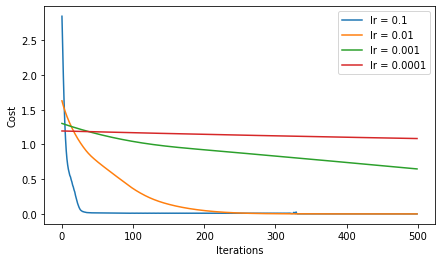

prediction accuracy is: 100.00 %
prediction accuracy is: 100.00 %
prediction accuracy is:  80.90 %
prediction accuracy is:  33.10 %


In [8]:
NN1 = ANN(hidden=[4,4], max_iter=500 , optimizer = 'ADAM',learning_rate=0.1,decay_rate1=0.9, decay_rate2=0.99, mu = None,epsilon=1e-8)
NN2 = ANN(hidden=[4,4], max_iter=500 , optimizer = 'ADAM',learning_rate=0.01,decay_rate1=0.9, decay_rate2=0.99, mu = None,epsilon=1e-8)
NN3 = ANN(hidden=[4,4], max_iter=500 , optimizer = 'ADAM',learning_rate=0.001,decay_rate1=0.9, decay_rate2=0.99, mu = None,epsilon=1e-8)
NN4 = ANN(hidden=[4,4], max_iter=500 , optimizer = 'ADAM',learning_rate=0.0001,decay_rate1=0.9, decay_rate2=0.99, mu = None,epsilon=1e-8)

NN1.train(x0,y0)
cache1 = NN1.loss_hist

NN2.train(x0,y0)
cache2 = NN2.loss_hist

NN3.train(x0,y0)
cache3 = NN3.loss_hist

NN4.train(x0,y0)
cache4 = NN4.loss_hist

_iter = np.arange(0,500)

plt.figure(figsize=(7,4))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(_iter,cache1,label = 'lr = 0.1')
plt.plot(_iter,cache2,label = 'lr = 0.01')
plt.plot(_iter,cache3,label = 'lr = 0.001')
plt.plot(_iter,cache4,label = 'lr = 0.0001')
plt.legend()
plt.savefig('LCADAM.png',bbox_inches = 'tight')
plt.show()

predict_accuracy(NN1.predict(x0),y)
predict_accuracy(NN2.predict(x0),y)
predict_accuracy(NN3.predict(x0),y)
predict_accuracy(NN4.predict(x0),y)

### similar to gradient descent, lrs of 0.1 and 0.01 give convergence and high prediction accuracy. Here, both of those learning rates are consistent if I run the above block of code several times. Obviously, we can drop 0.001 and 0.0001 as they need much more time to converge. for adam, i choose 0.1

### now lets take our chosen hyperparameters for each optimizer and compare their learning curves and time to complete 300 iterations.

56.6 ms ± 1.46 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
57.8 ms ± 612 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
63.3 ms ± 1.35 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


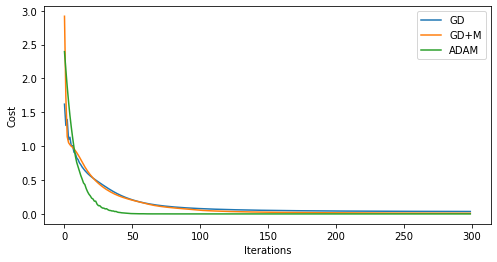

prediction accuracy is: 100.00 %
prediction accuracy is: 100.00 %
prediction accuracy is: 100.00 %


In [9]:
NN1 = ANN(hidden=[4,4], max_iter=300 , optimizer = 'GD',learning_rate=0.01,decay_rate1=0.99, mu = None, decay_rate2=None,epsilon=None)
NN2 = ANN(hidden=[4,4], max_iter=300 , optimizer = 'GD+M',learning_rate=0.01,decay_rate1=None, decay_rate2=None, mu = 0.10,epsilon=None)
NN3 = ANN(hidden=[4,4], max_iter=300 , optimizer = 'ADAM',learning_rate=0.1,decay_rate1=0.9, decay_rate2=0.99, mu = None,epsilon=1e-8)

%timeit -n 10 -r 10 NN1.train(x0,y0)
cache1 = NN1.loss_hist

%timeit -n 10 -r 10 NN2.train(x0,y0)
cache2 = NN2.loss_hist

%timeit -n 10 -r 10 NN3.train(x0,y0)
cache3 = NN3.loss_hist

_iter = np.arange(0,300)

plt.figure(figsize=(8,4))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(_iter,cache1,label = 'GD')
plt.plot(_iter,cache2,label = 'GD+M')
plt.plot(_iter,cache3,label = 'ADAM')
plt.legend()
plt.savefig('modelCompare.png',bbox_inches = 'tight')
plt.show()

predict_accuracy(NN1.predict(x0),y)
predict_accuracy(NN2.predict(x0),y)
predict_accuracy(NN3.predict(x0),y)

### All optimizers converge with the chosen hyperparameters, and all yield prediction accurcy = 100%. Its apparent that ADAM converges faster than both gradient descent algorithms. This can also be seen below.

In [10]:
# I tracked when the cost first converges, by some tolerance 1e-3.

print('Number of iterations before convergence:')
print('GD = %s, GD+MOM = %s, ADAM = %s' %(NN1.converged_iter,NN2.converged_iter,NN3.converged_iter))

Number of iterations before convergence:
GD = 98, GD+MOM = 106, ADAM = 23


## From the above studies, it is obvious that before choosing and using an optimizer, a parameter tuning session should occur. From my parameter tuning, I found optimal hyperparameters for each optimizer. 
- #### All three optimizers converged successfully with specific choice of hyperparameters. 
- #### In terms of speed considerations, gradient descent was the fastest optimizer (followed by gd + mom. and adam). This came from a study of 1000 iterations. 
- #### In terms of faster convergence, adam converged much faster than the other two optimizers.